## Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Importing necessary libraries

In [318]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [319]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

## Explore the data

In [320]:
# let's view a sample of the data
data.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50


In [321]:
data.shape

(7253, 14)

- There are 7253 row and 14 columns
- Among the columns 13 attributes are independent variables while Price is the dependent variable / target
- The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

S.No.: Serial number <br>
Name: Name of the car which includes brand name and model name <br>
Location: Location in which the car is being sold or is available for purchase<br>
Year: Manufacturing year of the car<br>
Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)<br>
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)<br>
Transmission: The type of transmission used by the car (Automatic/Manual)<br>
Owner: Type of ownership<br>
Mileage: The standard mileage offered by the car company in kmpl or km/kg<br>
Engine: The displacement volume of the engine in CC<br>
Power: The maximum power of the engine in bhp<br>
Seats: The number of seats in the car<br>
New_Price: The price of a new car of the same model in dollars<br>
Price: The price of the used car in dollars<br>

In [322]:
# let's create a copy of the data
df = data.copy()

In [323]:
# drop the S.No. column as it does not add any value to the analysis
df.drop("S.No.", axis =1, inplace =True)

In [324]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


**Observations**

- *Name*, *location*, *fuel_type* are categorical-type variables.
- mileage, engine, power are numeric but stored as object due to the incorrect data formatting data with units of values
- Transmission is meant to be boolean
- All other variables are numerical in nature.


In [325]:
# checking for duplicate values
df.duplicated().sum()

1

- There is 1 duplicate value in the data.
- We will drop the duplicate value.

In [326]:
# drop the duplicates
df.drop_duplicates(inplace =True)
# reset the index
df.reset_index(drop =True, inplace = True)

In [327]:
# Let's look at the statistical summary of the data
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7252,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7206,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7077,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

- The Manufacturing year of the car involved varies from 1996 to 2019
- The number of seats in the car varies from 0 to 10
- The minmum price of used care is 0.44  while the maximum price is 160
- The most common fuel type is diesel
- the most common transmission is manual
- There are quite a few missing values in the data.

In [328]:
# select categorical variables
cat_cols = df.select_dtypes(include = "object").columns.to_list()
# print out all the categories and frequency for each categorical variables
for col in cat_cols:
    print(df[col].value_counts())
    print("-" * 50)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------

#### Observations

- Location has 11 categories in it, and its mode is 'Mumbai'.
- Fuel_Type has 5 categories in it, and its mode is 'Diesel'.
- Owner_Type has 4 categories, and its mode is 'First'.
- Transmission has 2 categories; hence, it can be categorized as boolean.The mode is 'Manual'

## Data Cleaning

In [329]:
# checking for missing values in the data.
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
dtype: int64

* There are 2 missing values in Mileage column
* There are 46 missing values in Engine column
* There are 175 missing values in Power column
* There are 53 missing values in Seat column
* There are 1233 missing values in Price column - We will drop the missing values in `Price` column as it is the target variable.


In [330]:
# use subset in dropna to list the columnd
df.dropna(subset = ["Price"], inplace = True)

In [331]:
#reseting the index
df.reset_index(drop = True, inplace = True)

In [332]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [333]:
# treating Mileage
# check the unique duration
df.Mileage.unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

- the values are entered using two different units- km/kg and kmpl
- we will split the value and unit in Mileage

In [334]:
nu_mileage = []
for i in df['Mileage']:
    if 'km/kg' in str(i):
        i = float(i[:-6])
        i = i * 0.77
        nu_mileage.append(i)
    elif 'kmpl' in str(i):
        i = float(i[:-5])
        nu_mileage.append(i)
    else:
        nu_mileage.append(i)
        
# Correct_Mileage= []
# for i in df.Mileage:
#     if str(i).endswith('km/kg'):
#         i = i[:-6]
#         i = float(i)*1.40
#         Correct_Mileage.append(float(i))
#     elif str(i).endswith('kmpl'):
#         i = i[:-6]
#         #print(i)
#         Correct_Mileage.append(float(i))

In [335]:
# replacing the new list with Mileage
df['Mileage'] = nu_mileage

In [336]:
engine_size = []
for e in df['Engine']:
    if str(e).endswith('CC'):
        e = float(e[:-3])
        engine_size.append(e)
    else:
        engine_size.append(e)

In [337]:
# replacing the corrected list
df['Engine'] = engine_size

In [338]:
eng_power = []
for ep in df['Power']:
    if str(ep).endswith('bhp'):
        ep = float(ep[:-4])
        eng_power.append(ep)
    else:
        eng_power.append(ep)

In [339]:
df['Power'] = eng_power

In [340]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,20.482,998.0,58.16,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,53.14,17.74


In [341]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [342]:
#replacing the missing values with the mean based on the name of vehicle
df.Name.nunique()

1876

In [343]:
df.shape

(6019, 13)

In [344]:
df.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

- some of the unique values in the name column appeared just once. Hence, there it will be unecessary to calculate mean based on the Name column.
- all missing values will be dropped

In [345]:
df = df.dropna()

In [346]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [347]:
df.shape

(5872, 13)

In [348]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,20.482,998.0,58.16,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,53.14,17.74


### EDA

#### Univariate Analysis
- Here, we will use our utility functions for visualization

In [349]:
from utils import histogram_boxplot, labeled_barplot
# Utilis is a py file where the above function was saved

***Price* (the target variable)**

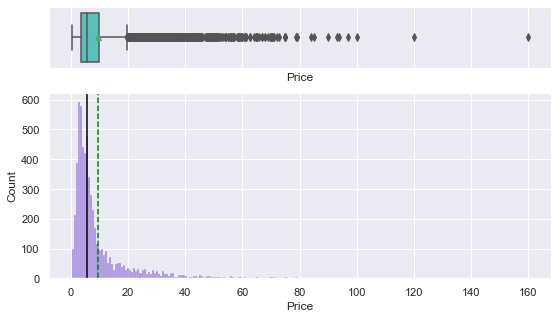

In [350]:
histogram_boxplot(data = df, feature = "Price")

- The target variable is right skewed
- the price varies from 0 to 160
- There are many outliers at the upper ends.
- To fix this distribution, the variable Price must be logged.

In [351]:
df['Price'] = np.log(df['Price'])

Text(0.5, 1.0, 'Histogram of Price')

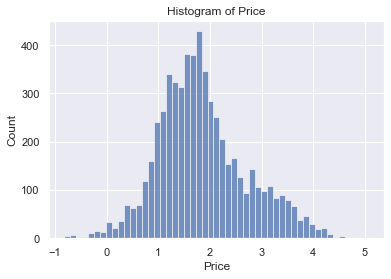

In [352]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='Price')
ax.set_title('Histogram of Price')

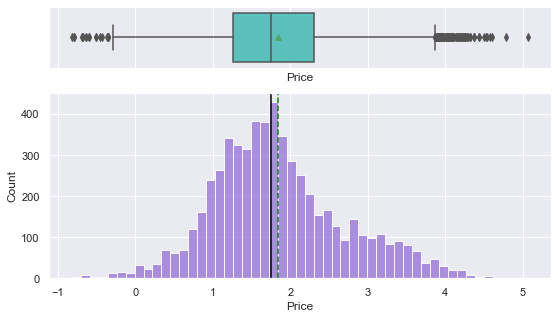

In [353]:
histogram_boxplot(data = df, feature = "Price")

- skewness has been fixed using the log transform method
- There are a few outliers both at the upper and lower ends.

#### Visualizing each of the features
***Kilometers_Driven***

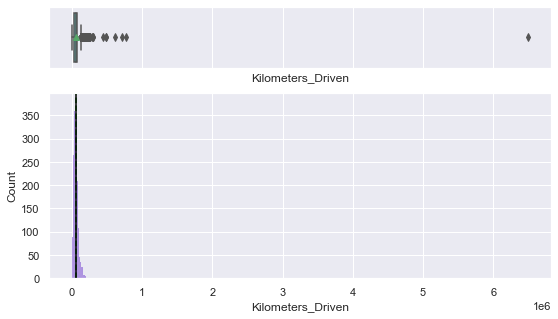

In [354]:
histogram_boxplot(df, "Kilometers_Driven")

**Observations**

- The distribution of Kilometers_Driven is right-skewed, indicating that very few observations are between the range of 10,000 -50,000 kilometers
- There are several outliers; only one observation exceeds 100,000 Kilometers_Driven

***Mileage***

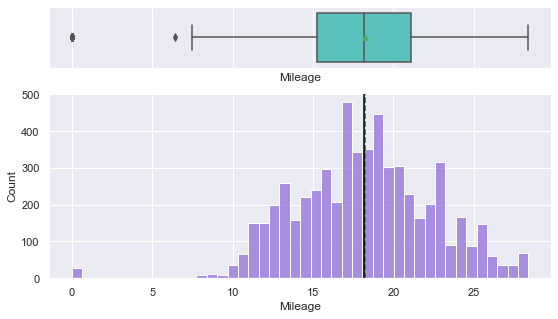

In [355]:
histogram_boxplot(df, "Mileage")

- the mileage feature isnormally ditributed
- has few outliers

***Engine***

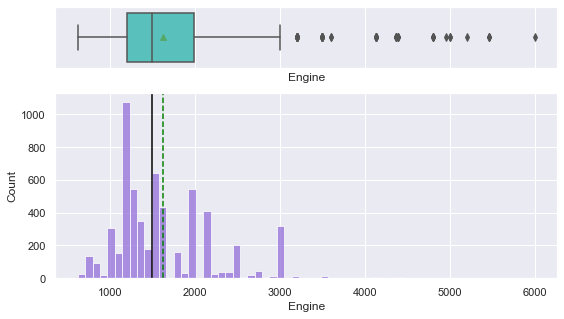

In [356]:
histogram_boxplot(df, "Engine")

- the Engine feature is normally ditributed
- has many outliers

***Power***

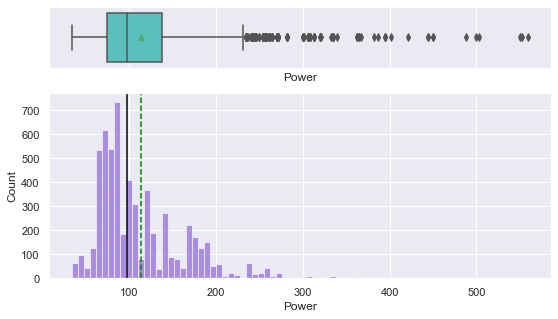

In [357]:
histogram_boxplot(df, "Power")

**Observations**

- The distribution of Power is right-skewed, indicating that very few observations are between the range of 100 -500 
- There are several outliers 

***Seats***

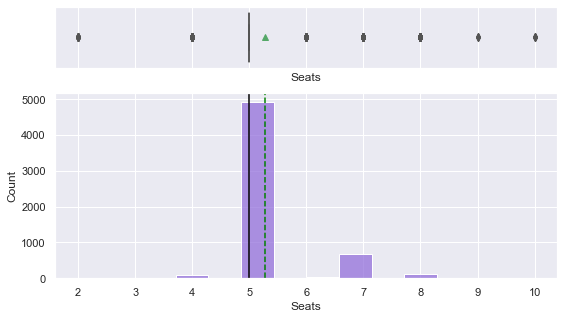

In [358]:
histogram_boxplot(df, "Seats")

- the Seats feature is normally ditributed
- has few outliers

***New_Price***

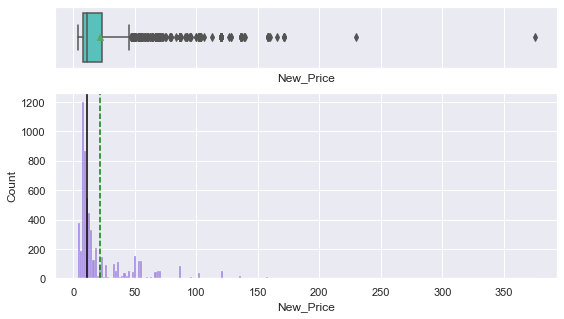

In [359]:
histogram_boxplot(df, "New_Price")

**Observations**

- The distribution of New_Price is right-skewed, indicating that the prices of many new cars are very high 
- There are several outliers 

#### Categorial Variables
***Fuel_Type***

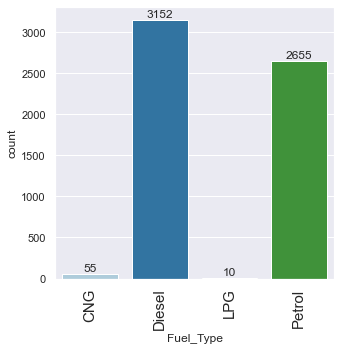

In [360]:
labeled_barplot(df, "Fuel_Type")

- A vast majority ofthe fuel types are Diesel and Petrol

***Transmission***

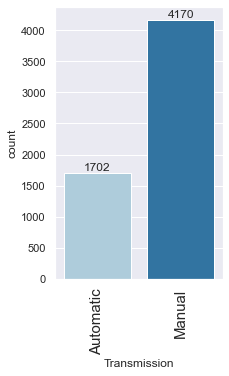

In [361]:
labeled_barplot(df, "Transmission")

- Over 50% of the observation are Manual vehicle type

***Year***

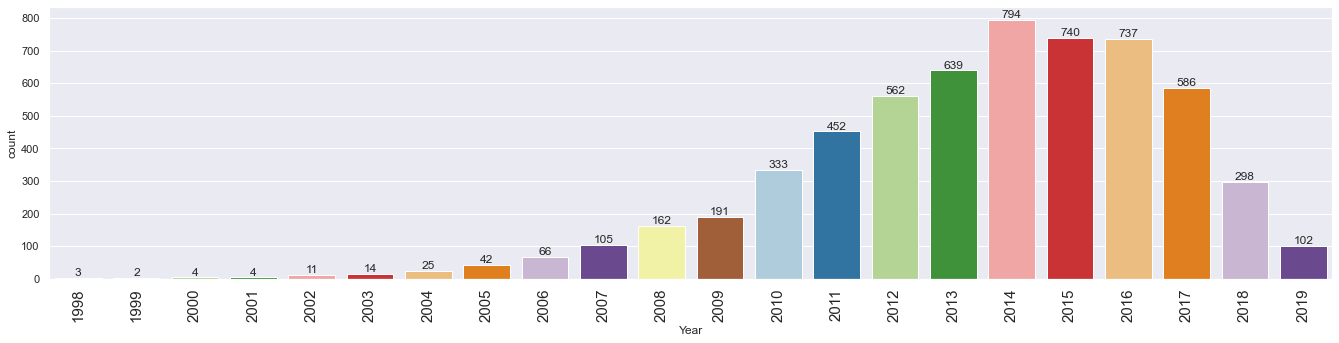

In [362]:
labeled_barplot(df, "Year")

- majority of the cars were manufactured between 2011 to 2017

***Location***

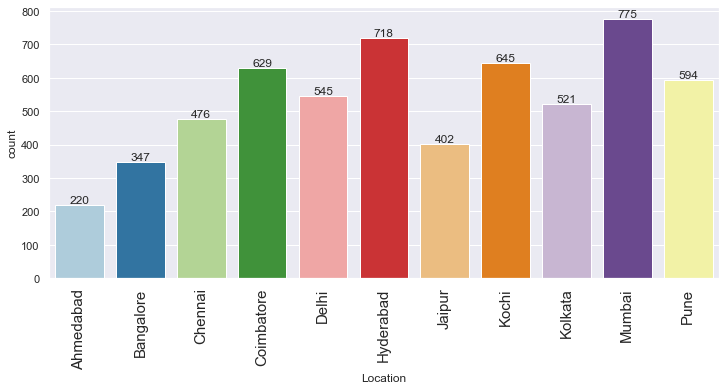

In [363]:
labeled_barplot(df, "Location")

- the most common location of sale is Mumbai

***Owner_Type***

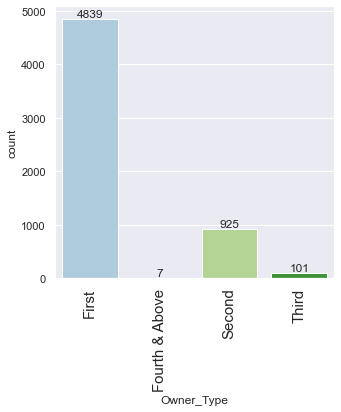

In [364]:
labeled_barplot(df, "Owner_Type")

- majority of the cars have a first-type ownership

#### Bivariate Analysis

**Let's check the correlation between numerical columns.**

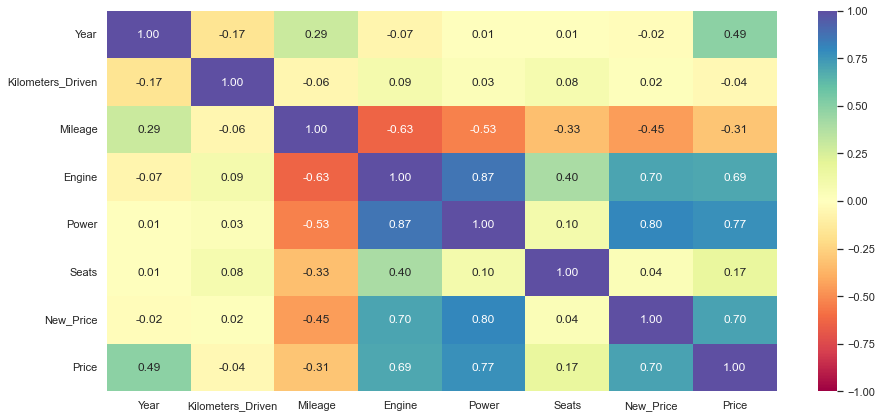

In [366]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- The target (log transformed price) is moderately correlated with Year and Mileage and highly correlated with Engine, Power and New_Price
- many of the feautures have high correlation between themselves. Hence we can either remove one to avoid multi-collinearity or subject the dataset to lasso or ridge regression
- Engine and Power have the highest positive correlation of 0.87 indicating that as Engine increases, Power also increase
- New Price and Power has a high positive correlation of 0.80
- New Price and Engine has a high positive  correlation of 0.70
- Mileage and Engine has a high negative correlation of - 0.63 indicating that as Mileage decreases, Engine increase
- Mileage and Power has a high negative correlation of - 0.53 indicating that as Mileage decreases, Power increase

***New Price* vs *Price***

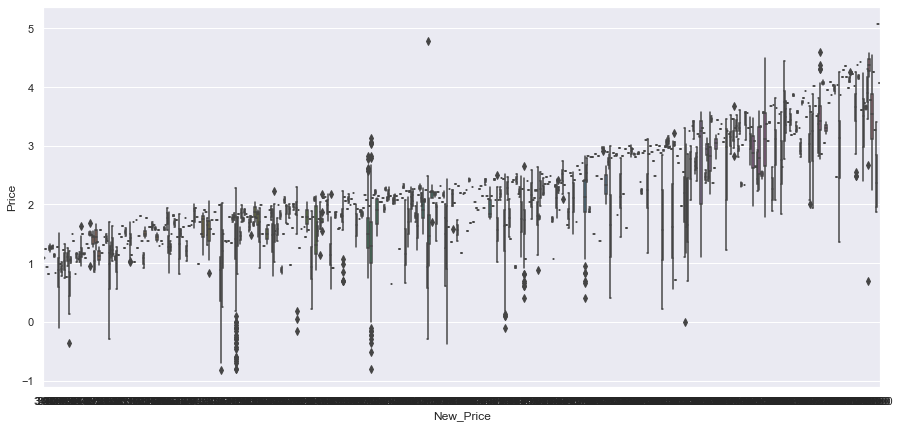

In [367]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="New_Price", y="Price", data=df)
plt.show()

- price inreases as new price increases

***Power* vs *Price***

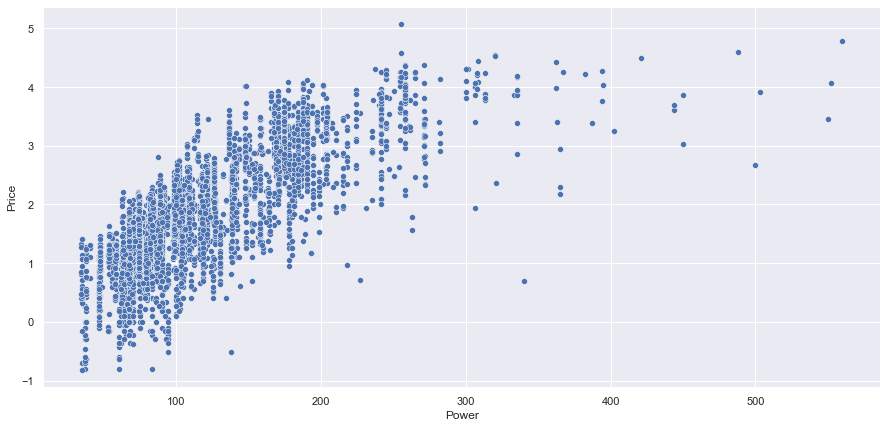

In [368]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Power", y="Price", data=df)
plt.show()

- Increase in power affects the price positively

***Engine* vs *Price***

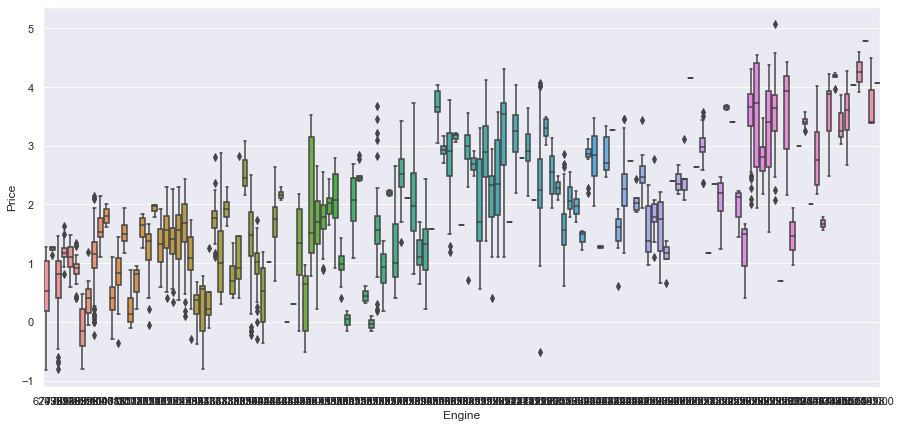

In [369]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Engine", y="Price", data=df)
plt.show()

- Price increases with an increase in the engine value

### Further Pre-processing

In [370]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.000000,2012.00000,2014.0000,2016.000000,2.019000e+03
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.000000,33422.50000,52609.0000,72402.750000,6.500000e+06
Mileage,5872.0,18.215158,4.294703,0.000000,15.26000,18.2000,21.100000,2.840000e+01
Engine,5872.0,1625.745572,601.641783,624.000000,1198.00000,1495.5000,1991.000000,5.998000e+03
Power,5872.0,113.276894,53.881892,34.200000,75.00000,97.7000,138.100000,5.600000e+02
Seats,5872.0,5.283719,0.805081,2.000000,5.00000,5.0000,5.000000,1.000000e+01
New_Price,5872.0,21.635792,24.278063,3.910000,7.96000,11.3000,23.152500,3.750000e+02
Price,5872.0,1.845541,0.864006,-0.820981,1.25775,1.7492,2.302585,5.075174e+00


- the minumum mileage is 0
- the mimumum year of manufactured carsobserved in the analysis is 1998while the maximum is 2019
- the minumum number of seat in a car is 2 while the maximum is 10
- the lowest price of a new car is 3.9

In [371]:
#### Grouping of data

In [372]:
# select only numerical columns 
num_cols = df.select_dtypes(include =np.number).columns.to_list()
cat_cols = df.select_dtypes(exclude =np.number).columns.to_list()


In [373]:
cat_cols

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

#### Outlier Detection and Treatment

- Let's check for outliers in the data.

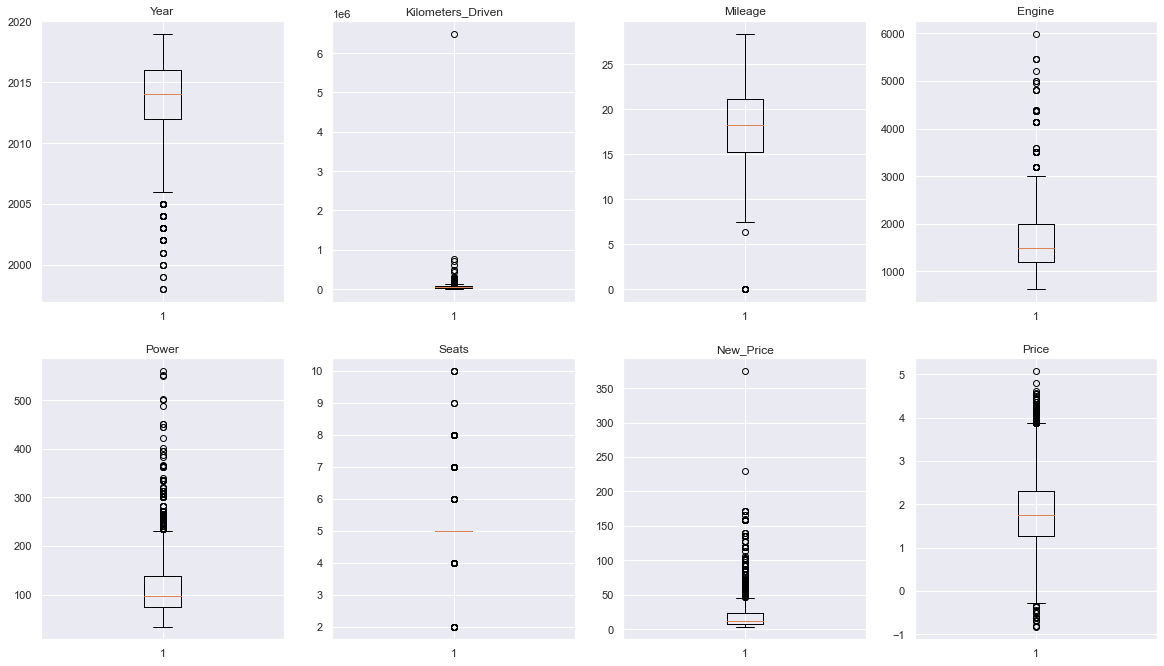

In [374]:
# outlier detection using boxplot
# use the numeric columns we created above
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

**Observations**

- All numerical variables have outliers.
- *Year* and *Mileage* have only lower outliers.
- *Price* has both upper and lower outliers.
- all other numerical columns have both upper and lower outliers.
- one of the assumptions of linear regression is that, if possible, there should be no outliers in the data or very few. This is also applicable to the target, hence we will treat all the outliers

###### Outlier Treatment

- Let's treat all the outliers by flooring and capping.

In [375]:
# illustrate clipping values to minimum and maximum

l1 = [-200, 5, 0, 1000]
# 5 is representing upper whisker while 1000 is above it
# 0 is representing lower whisker while -200 is below it
# use np.clip function to clip the outliers to the minimum i.e. -200 to 0 and maximum i.e. 1000 to 5
np.clip(l1, 0, 5)


array([0, 5, 0, 5])

In [376]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1  # Inter Quartile Range
    Lower_Whisker = Q1 - 1.5 * IQR # formular the boxplot used to determine the lower_whisker
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [377]:
# treating the outliers
# numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, num_cols)

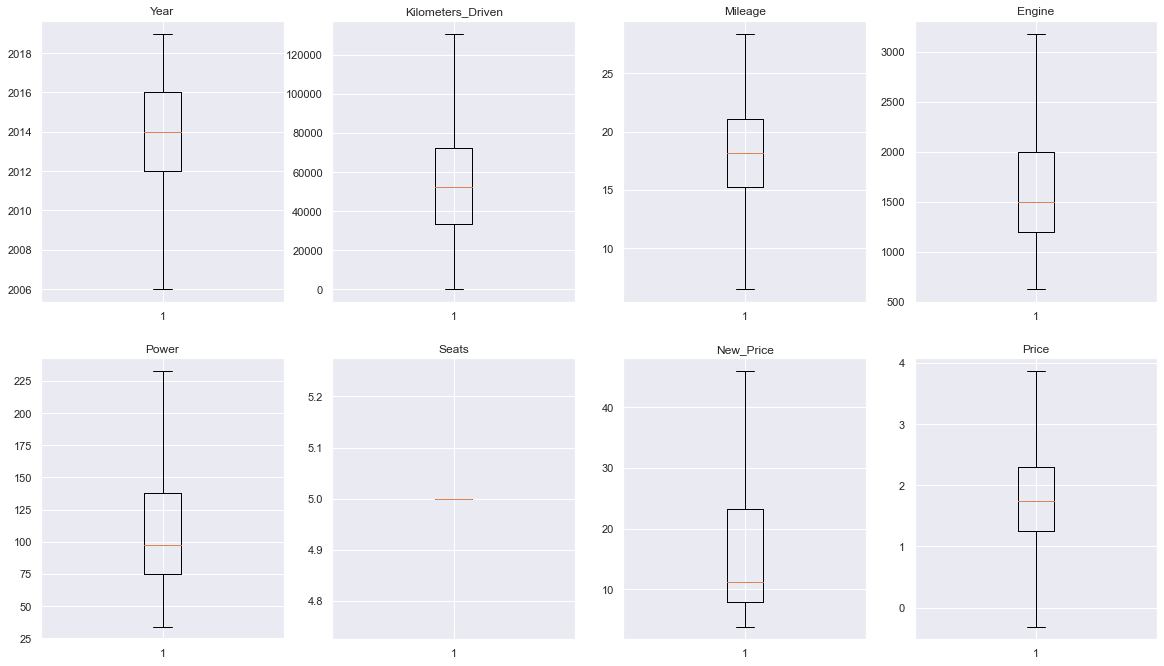

In [378]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    #plt.tight_layout()
    plt.title(variable)

plt.show()

#### Label Encoding
the Name column will be label encoded because it has a very high number of categories

In [379]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()# declares an instance of the object 
le_data = le.fit_transform(df[['Name']])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['Name']) # creates a dataframe 
df_le = pd.concat([df,df_le], axis = 1) 
df_le

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,20.482,998.0,58.16,5.0,5.51000,0.559616,1148.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.670,1582.0,126.20,5.0,16.06000,2.525729,496.0
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.200,1199.0,88.70,5.0,8.61000,1.504077,470.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.770,1248.0,88.76,5.0,11.27000,1.791759,1015.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,45.94125,2.875822,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595.0
5647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1588.0
5755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1091.0
5759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,974.0


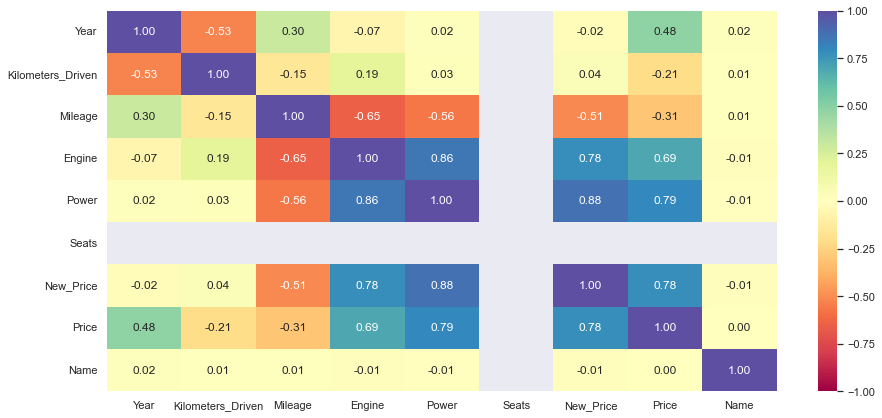

In [380]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_le.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [381]:
df_le.isnull().sum()

Name                 142
Location             142
Year                 142
Kilometers_Driven    142
Fuel_Type            142
Transmission         142
Owner_Type           142
Mileage              142
Engine               142
Power                142
Seats                142
New_Price            142
Price                142
Name                 142
dtype: int64

- there is a moderate positive correlation of 0.48 between the Name of Cars and Price. However, after subjecting the data to label encoding to determine the impact of the name ofcars on the target, 142 rows went missing. Hence, the Name column will be removed from the data during feature selection

In [382]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [383]:
# create a copy of df
df2 = df.copy()

In [384]:
df.shape

(5872, 13)

In [385]:
df2.shape

(5872, 13)

### Linear Model Building

#### splitting of variables into independent and dependent

In [386]:
# defining the dependent and independent variables
X = df.drop("Price", axis=1)
y = df["Price"]

In [387]:
X

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,20.482,998.0,58.16,5.0,5.51000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.670,1582.0,126.20,5.0,16.06000
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.200,1199.0,88.70,5.0,8.61000
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.770,1248.0,88.76,5.0,11.27000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,45.94125
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014.0,27365.0,Diesel,Manual,First,28.400,1248.0,74.00,5.0,7.88000
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015.0,100000.0,Diesel,Manual,First,24.400,1120.0,71.00,5.0,8.23000
6016,Mahindra Xylo D4 BSIV,Jaipur,2012.0,55000.0,Diesel,Manual,Second,14.000,2498.0,112.00,5.0,11.67000
6017,Maruti Wagon R VXI,Kolkata,2013.0,46000.0,Petrol,Manual,First,18.900,998.0,67.10,5.0,5.51000


#### One-hot encoding
conversion of all categorical variables to numeric using the get dummies function

In [388]:
# creating dummy variables
X = pd.get_dummies(X, drop_first= True)
X.shape

(5872, 1834)

In [389]:
X

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  New_Price  \
0     2010.0            72000.0   20.482   998.0   58.16    5.0    5.51000   
1     2015.0            41000.0   19.670  1582.0  126.20    5.0   16.06000   
2     2011.0            46000.0   18.200  1199.0   88.70    5.0    8.61000   
3     2012.0            87000.0   20.770  1248.0   88.76    5.0   11.27000   
4     2013.0            40670.0   15.200  1968.0  140.80    5.0   45.94125   
...      ...                ...      ...     ...     ...    ...        ...   
6014  2014.0            27365.0   28.400  1248.0   74.00    5.0    7.88000   
6015  2015.0           100000.0   24.400  1120.0   71.00    5.0    8.23000   
6016  2012.0            55000.0   14.000  2498.0  112.00    5.0   11.67000   
6017  2013.0            46000.0   18.900   998.0   67.10    5.0    5.51000   
6018  2011.0            47000.0   25.440   936.0   57.60    5.0   11.30000   

      Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   
...                              ...                          ...   
6014                               0                            0   
6015                               0                            0   
6016                               0                            0   
6017                               0                            0   
6018                               0                            0   

      Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
...                                ...                             ...   
6014                                 0                               0   
6015                                 0                               0   
6016                                 0                               0   
6017                                 0                               0   
6018                                 0                               0   

      Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
0                         0                                         0   
1                         0                                         0   
2                         0                                         0   
3                         0                                         0   
4                         0                                         0   
...                     ...                                       ...   
6014                      0                                         0   
6015                      0                                         0   
6016                      0                                         0   
6017                      0                                         0   
6018                      0                                         0   

      Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   
...                    ...            

- There is a wide increase in the number of columns after one-hot encoding; this is due to the high number of categories in the Name column

In [390]:
# splitting the data in 80:20 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

In [391]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4697
Number of rows in test data = 1175


#### Normalize the data

using the Standard Scaler

In [392]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [393]:
# fitting the linear model
lin_reg = LinearRegression()
lin_reg.fit(x_train_sc, y_train)

LinearRegression()

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [394]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [395]:
# Checking model performance on train set
train_pf = model_performance_regression(lin_reg, x_train_sc, y_train)
train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.113742,0.07914,0.982038,0.970527,inf


- the performance is great; this could be seen from the correlation plot. Most of the features had contributions to the target
- from the error, the model is making some mistakes especially MAPE having an infinity value
- The R squared is the percentage of the variation in the target that is explained by the independent variables in the data. Our model is able to explain approximately only 98% of the variation in the determination of price of cars
- the adjusted R square of 97% is a little bit lesser than the R squared

In [396]:
df.shape

(5872, 13)

In [397]:
# Checking model performance on test set
test_pf = model_performance_regression(lin_reg, x_test_sc, y_test)
test_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.894601e+11,8.884471e+10,-4.758074e+23,8.463605e+23,inf


- the result of the test performance is infinity; this could be as a result of multicollinearity between the features.  Hence, the model will be regularized using lasso and rigde regression which will resolve the problem of multicollienarity by reducing the effect of unimportant features in the data

In [398]:
lin_reg.coef_

array([ 0.29367303, -0.05070686, -0.03076298, ..., -0.00185013,
       -0.01923561, -0.02044296])

#### Ridge Regression

In [399]:
# import the Ridge algorithm
from sklearn.linear_model import Ridge
# instantiate the model

ridge = Ridge()
# alpha is a regularization parameter that help to adjust those values of unimportant values
# the default is 1; the higher the value, the more harsh it will be reducng the values of unimportant variable

# fit the model

ridge.fit(x_train_sc, y_train)
# training and test accuracy
print("Train Accuracy : {:.3f}".format(ridge.score(x_train_sc, y_train)))
print("Test Accuracy : {:.3f}".format(ridge.score(x_test_sc, y_test)))

Train Accuracy : 0.983
Test Accuracy : 0.933


- the train accuracy is similar to the R-square in Linear regression
- the test accuracy is in ridge regression can now be oserved as 93%. This indicates that the model is generalizing well

In [400]:
# Checking model performance on train set
ridge_train_pf = model_performance_regression(ridge, x_train_sc, y_train)
ridge_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.110867,0.072337,0.982934,0.971998,inf


In [401]:
# Checking model performance on test set
ridge_test_pf = model_performance_regression(ridge, x_test_sc, y_test)
ridge_test_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22127,0.151179,0.932955,1.119259,inf


- the R-squared on both Rigde and Linear regression training data are similar. The test data R-squared is slightly lower
- the adjusted R-square is higher on the test data than the train data
- The MAPE performance in the two models remains infinity
- The RMSE and MAE are low indicating that the model is making a little mistake; However the test data errors are slightly higher than that of the train data

#### Lasso Regression
- An alternative to Ridge for regularizing linear regression is the Lasso. The lasso also
restricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly
different way, called “l1” regularization.
- The consequence of l1 regularization is that when using the Lasso, some coefficients
are exactly zero.

In [402]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_sc, y_train)

Lasso()

In [403]:
# model performance on the train data
lasso_train_pf = model_performance_regression(lasso, x_train_sc, y_train)
lasso_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.848671,0.663174,0.0,-0.640811,inf


- lasso was too harsh 
- lasso gave a R squared of 0 becauseit didn't find any of the variables important; hence it shrinked all the coefficients to 0
- we can try again by reducing the value of alpha

In [404]:
lasso.coef_

array([ 0., -0., -0., ..., -0., -0., -0.])

- all the hyperparemeter coefficient of each variable were shrinked to 0 because the lasso regression model couldn't find any variable important

In [405]:
# lets adjust the alpha to 0.2
lasso = Lasso(alpha =0.2)
lasso.fit(x_train_sc, y_train)

Lasso(alpha=0.2)

In [406]:
# model performance on the train data
lasso_train_pf = model_performance_regression(lasso, x_train_sc, y_train)
lasso_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.401974,0.314212,0.775654,0.631891,inf


In [407]:
lasso.coef_

array([ 0.20907949, -0.        , -0.        , ..., -0.        ,
       -0.        , -0.        ])

- when the alpha was reduced, R-squared was drastically increased but still very low but not as high as those of the previously used models; this is because lasso reduced the coffeicient of many the variables to 0 and only used few variables

In [408]:
# adjusting alpha to 0.01
lasso = Lasso(alpha =0.01)
lasso.fit(x_train_sc, y_train)

Lasso(alpha=0.01)

In [409]:
lasso_train_pf = model_performance_regression(lasso, x_train_sc, y_train)
lasso_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222653,0.171433,0.93117,0.887063,inf


In [410]:
lasso_test_pf = model_performance_regression(lasso, x_test_sc, y_test)
lasso_test_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224967,0.172901,0.930696,1.123277,inf


#### General Observations

- The train and test $R^{2}$ are 0.982 and 0.933, indicating that the model explains 98.2% and 93.3% of the total variation in the train and test sets respectively except the lasso regression yielding 93% for both test and train. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE result flunctuated amongdifferent models between 0.07 -0.17 indicating that the models are able to predict price within the mean error of 0.07 -0.17

- MAPE performace was infinity; this could be bause a number of the values in the one-hot encoded dataset have values close to 0

- However, the overall performance is great.




In [411]:
df.shape

(5872, 13)

#### Forward Feature Selection

- Let us try using forward feature selection on the data to check if we can get a good model performance using a lesser number of features.

#### Dropping the name column

dropping the Name column as it could be responsible for infinity MAPE results if one-hot encoded and also delayed feature selection model due to extremely high number of categories

In [412]:
df2.shape

(5872, 13)

In [413]:
df2.drop("Name", axis =1, inplace =True)

In [414]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   float64
 2   Kilometers_Driven  5872 non-null   float64
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  New_Price          5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(8), object(4)
memory usage: 725.4+ KB


In [415]:
## Splitting of data
# defining the dependent and independent variables
X = df2.drop("Price", axis=1)
y = df2["Price"]

In [416]:
df2.shape

(5872, 12)

In [417]:
# creating dummy variables
X = pd.get_dummies(X, drop_first= True)
X.shape

(5872, 24)

In [418]:
# splitting the data in 80:20 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

In [419]:
X

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010.0,72000.0,20.482,998.0,58.16,5.0,5.51000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015.0,41000.0,19.670,1582.0,126.20,5.0,16.06000,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011.0,46000.0,18.200,1199.0,88.70,5.0,8.61000,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012.0,87000.0,20.770,1248.0,88.76,5.0,11.27000,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013.0,40670.0,15.200,1968.0,140.80,5.0,45.94125,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014.0,27365.0,28.400,1248.0,74.00,5.0,7.88000,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
6015,2015.0,100000.0,24.400,1120.0,71.00,5.0,8.23000,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6016,2012.0,55000.0,14.000,2498.0,112.00,5.0,11.67000,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
6017,2013.0,46000.0,18.900,998.0,67.10,5.0,5.51000,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [420]:
### Normalize

from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [421]:
# fitting the linear model
lin_reg = LinearRegression()
lin_reg.fit(x_train_sc, y_train)

LinearRegression()

In [422]:
# Checking model performance on train set
train_pf = model_performance_regression(lin_reg, x_train_sc, y_train)
train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24262,0.179252,0.918271,0.917851,inf


In [423]:
# Checking model performance on test set
test_pf = model_performance_regression(lin_reg, x_test_sc, y_test)
test_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227531,0.175856,0.929107,0.927627,inf


- On the train set, the R-square reduced from 98% to 92% indicating that the Name feature contributedsgnificantly to the train model
- the adjusted R-square and R-squared are slightly higheron the test data than train data; this could indicate that the new model is generalizing well
- MAPE value remains infinity; this indicate that the Name feauture was not responsible for the high error value in the previous models
- MAE and RMSE remain low and similar to previous models indicating that our model is making little mistakes

In [424]:
# pip install mlxtend==0.20.0
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5, #cross validation
)

# Perform SFFS
sfs = sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   45.6s finished

[2023-02-05 17:05:46] Features: 1/24 -- score: 0.62487295462027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.5s finished

[2023-02-05 17:05:47] Features: 2/24 -- score: 0.8464064986425512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2023-02-05 17:05:48] Features: 3/24 -- score: 0.8910318871318867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2023-02-05 17:05:48] Features: 4/24 -- score: 0.899363571324896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent wor

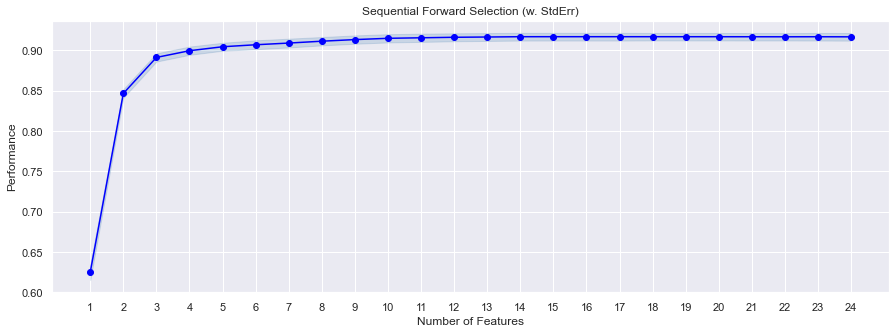

In [425]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.show()

**Observations**

* The model performance appears to have become constant somewhere around 11 features.
* We will take 11 as the number of features to consider.

In [426]:
# pip install mlxtend==0.20.0
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=11,
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5, #cross validation
)

# Perform SFFS
sfs = sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2023-02-05 17:06:38] Features: 1/11 -- score: 0.62487295462027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2023-02-05 17:06:38] Features: 2/11 -- score: 0.8464064986425512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2023-02-05 17:06:39] Features: 3/11 -- score: 0.8910318871318867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2023-02-05 17:06:39] Features: 4/11 -- score: 0.899363571324896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent wor

- the 11 important features that contribute to the target were used
- the r-squared score is approximately similar when using fewer important features

In [427]:
# identify the index of the important features used
feat_cols = list(sfs.k_feature_idx_)
feat_cols

[0, 1, 3, 4, 6, 7, 9, 11, 14, 17, 20]

In [428]:
x_train.columns[feat_cols]
# this will give us the selected important columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'New_Price',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Hyderabad',
       'Location_Kolkata', 'Fuel_Type_Diesel', 'Transmission_Manual'],
      dtype='object')

In [429]:
# to select the data itself, we will wrap everything around the x_train data
x_train_new = x_train[x_train.columns[feat_cols]]
x_test_new = x_test[x_test.columns[feat_cols]]

x_train_new

,Year,Kilometers_Driven,Engine,Power,New_Price,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Kolkata,Fuel_Type_Diesel,Transmission_Manual
3957,2016.0,53886.0,799.0,53.30,4.78000,0,0,0,0,0,1
5389,2017.0,100400.0,1396.0,69.00,7.63000,0,0,0,0,1,1
1472,2017.0,9500.0,1999.0,149.92,21.77000,0,0,0,0,0,0
3679,2017.0,10000.0,2143.0,167.62,45.94125,0,0,1,0,1,0
1305,2016.0,31000.0,1995.0,190.00,45.94125,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5059,2017.0,58829.0,1248.0,88.50,9.89000,0,1,0,0,1,1
3351,2014.0,32720.0,1396.0,90.00,10.25000,0,0,0,0,1,1
1699,2007.0,90000.0,2499.0,143.00,35.29000,0,0,0,0,1,1
2683,2017.0,26400.0,998.0,67.04,5.87000,0,0,1,0,0,1


**Now we will fit a sklearn model using these features only.**

In [430]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_new = scaler.fit_transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

In [431]:
# Fitting linear model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train_new, y_train)

LinearRegression()

In [432]:
# model performance on train set
print("Training Performance:")
train_pf2 = model_performance_regression(lin_reg2, x_train_new, y_train)
train_pf2

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.245674,0.18142,0.916201,0.916004,inf


- the training performance with fewer features is approximately equal. So, definitely, it doesnt worth using the whole features in building the model. This will not necessary improve the perfomance but it will reduce the overhead/ complexity of the model since we are going to get similar performance on the reduced number of features

In [433]:
# model performance on test set
print("Test Performance:")

test_pf2 = model_performance_regression(lin_reg2, x_test_new, y_test)
test_pf2

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230398,0.177751,0.927309,0.926621,inf


### CONCLUSION

* We have been able to explain approximately 93% of the variation in the test data using 11 features.
* The model has a high test accuracy of 92.7% indicating that the model is able to explain approximately only 93% of the variation in the determination of price of cars
* The RMSE and MAE are low indicating that the model is making a only a little mistake
* The linear regression model with 11 features can be deployed to reduce the overhead and complexity of model
